# Lab 1
## Part 1 Signal Generation

In [1]:
%matplotlib widget
from lab_1.signal import *

T = 64 # Total time duration in seconds
A = 1.0 # Amplitude
a1, a2, a3 = 10, 1, 0.1 # Coefficients for the quadratic chirp

# Determine the Nyquist frequency for the quadratic chirp
Nyquist_freq = Nyquist_frequency_of_quadratic_chirp(a1, a2, a3, T)
f_max = find_pow_2(Nyquist_freq)
sampling_rate = 2 * f_max
delta_t = 1 / sampling_rate
N = int(T / delta_t)  # Number of samples

In [2]:
time_series = np.arange(0, T, delta_t)
signal = generate_quadratic_chirp(time_series, A, a1, a2, a3)

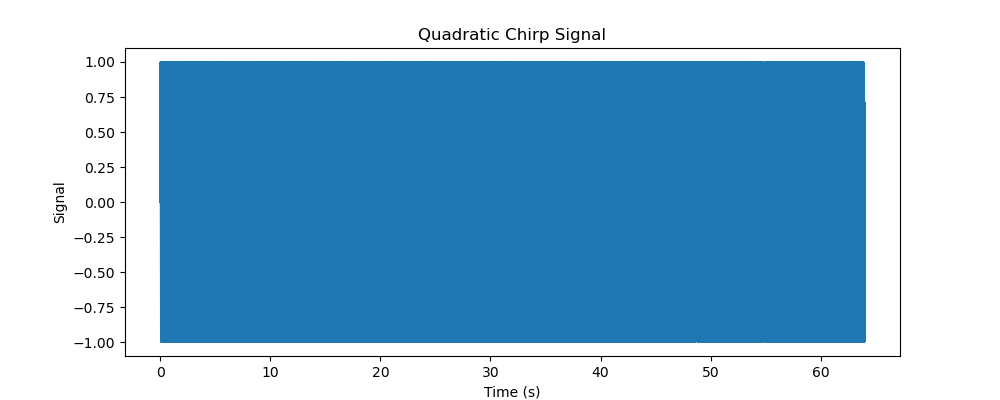

In [3]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 4))
plt.plot(time_series, signal)
plt.title('Quadratic Chirp Signal')
plt.xlabel('Time (s)')
plt.ylabel('Signal')
plt.show()

### Play the signal

In [4]:
# import sounddevice as sd
# sd.play(signal, sampling_rate)
# sd.wait()

from scipy.io.wavfile import write
write("lab_1/lab_1.wav", sampling_rate, (signal / A * 32767).astype(np.int16))

## Part 2 FFT

In [5]:
fd_signal = np.fft.fft(signal)
freq_series = np.fft.fftfreq(N, delta_t)

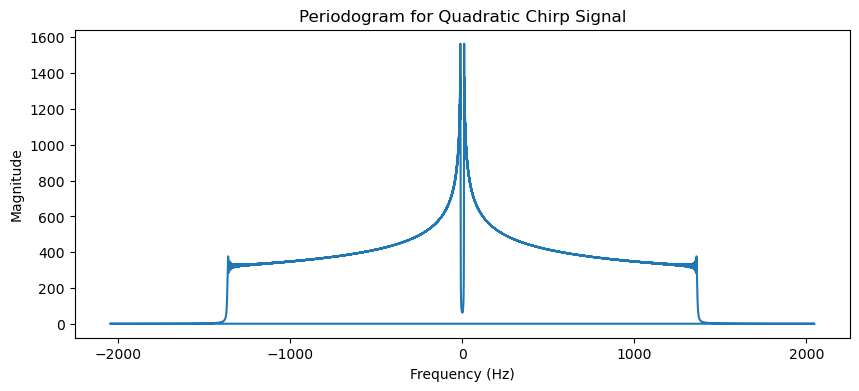

In [6]:
plt.figure(figsize=(10, 4))
plt.plot(freq_series, np.abs(fd_signal))
plt.title('Periodogram for Quadratic Chirp Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

## Advanced Lab

### 1. Spectrogram

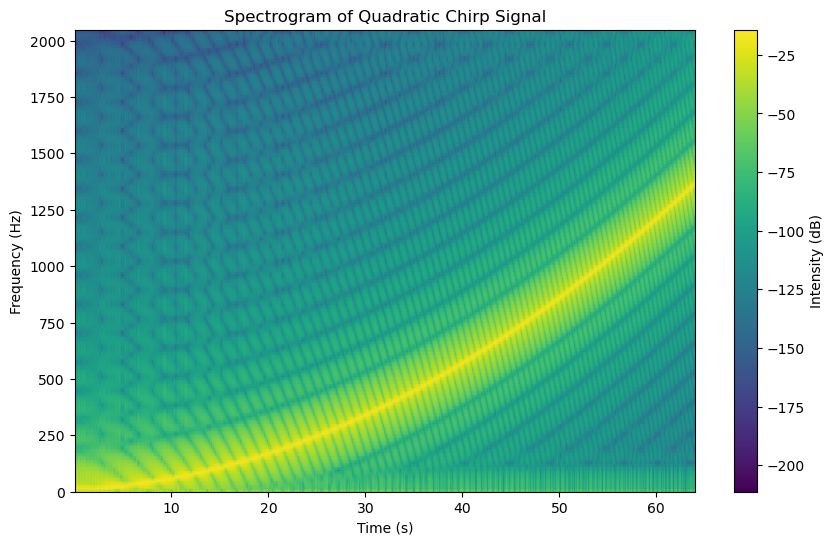

In [7]:
from scipy.signal import spectrogram

f, t, Sxx = spectrogram(signal, fs=sampling_rate, nperseg=256)
plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
plt.title('Spectrogram of Quadratic Chirp Signal')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.colorbar(label='Intensity (dB)')
plt.show()

### 2. Filtering

In [8]:
sin_sampling_rate = 1024  # Sampling rate for the sinusoid
sin_Nyquist_freq = sin_sampling_rate / 2
sin_N = 2048  # Number of samples for the sinusoid
sin_time_series = np.arange(0, sin_N / sin_sampling_rate, 1 / sin_sampling_rate)
signal_1 = generate_sinusoidal(sin_time_series, 10, 100, 0)
signal_2 = generate_sinusoidal(sin_time_series, 5, 200, np.pi / 6)
signal_3 = generate_sinusoidal(sin_time_series, 2.5, 300, np.pi / 4)
sin_signal = signal_1 + signal_2 + signal_3

In [9]:
# import sounddevice as sd
# sd.play(sin_signal, samplerate=sin_sampling_rate)
# sd.wait()

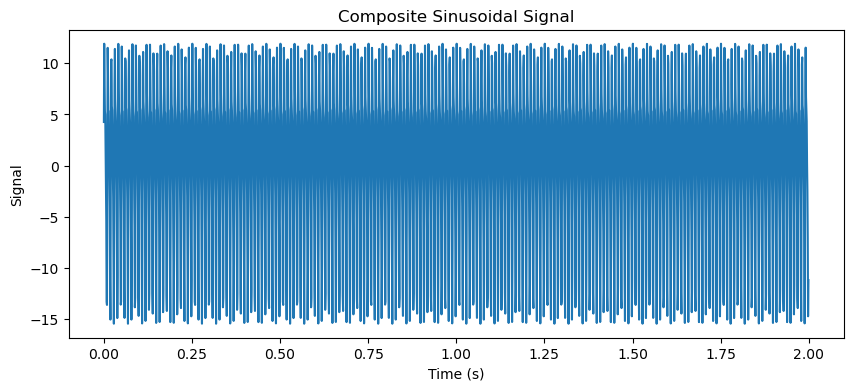

In [10]:
plt.figure(figsize=(10, 4))
plt.plot(sin_time_series, sin_signal)
plt.title('Composite Sinusoidal Signal')
plt.xlabel('Time (s)')
plt.ylabel('Signal')
plt.show()

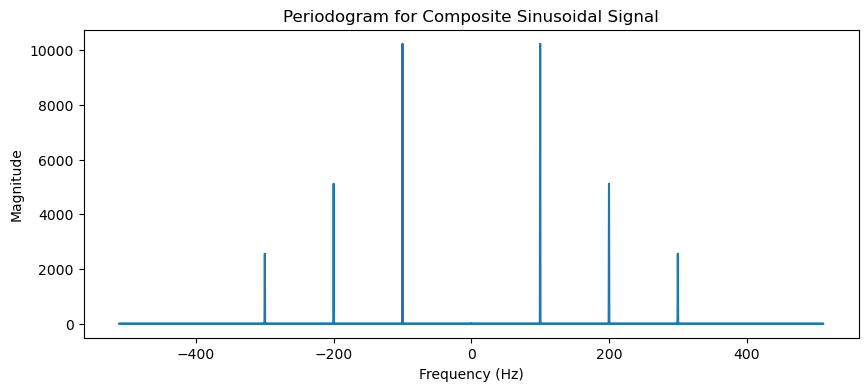

In [11]:
sin_fd_signal = np.fft.fft(sin_signal)
sin_freq_series = np.fft.fftfreq(sin_N, 1 / sin_sampling_rate)

plt.figure(figsize=(10, 4))
plt.plot(sin_freq_series, np.abs(sin_fd_signal))
plt.title('Periodogram for Composite Sinusoidal Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

### Low-pass Filter at 100 Hz

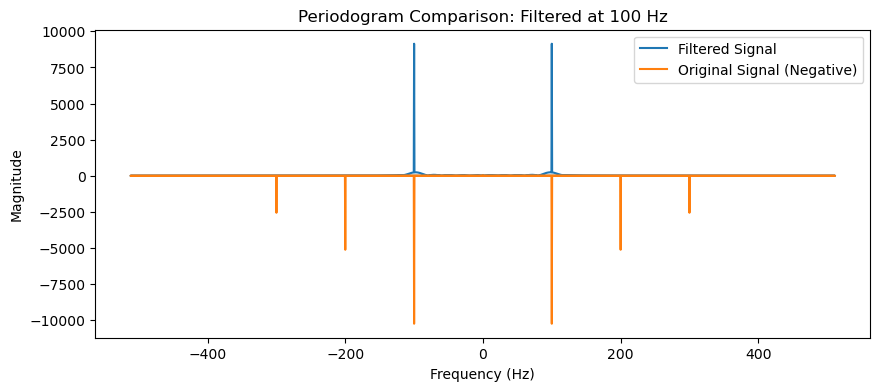

In [12]:
from scipy.signal import firwin, lfilter

# Design a low-pass FIR filter
fir_1 = firwin(numtaps=101, cutoff=110/sin_Nyquist_freq, pass_zero=True)
fir_1_signal = lfilter(fir_1, 1.0, sin_signal)
fd_fir_1_signal = np.fft.fft(fir_1_signal)

plt.figure(figsize=(10, 4))
plt.plot(sin_freq_series, np.abs(fd_fir_1_signal), label='Filtered Signal')
plt.plot(sin_freq_series, -np.abs(sin_fd_signal), label='Original Signal (Negative)')
plt.title('Periodogram Comparison: Filtered at 100 Hz')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.show()

### Band-pass Filter at 200 Hz

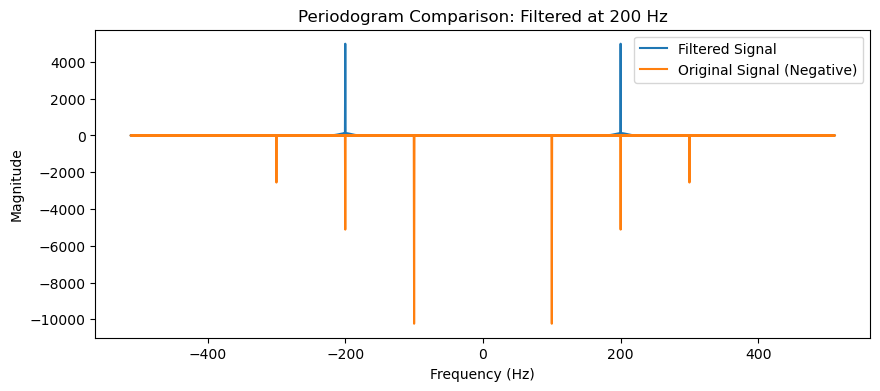

In [13]:
fir_2 = firwin(numtaps=101, cutoff=[190/sin_Nyquist_freq, 210/sin_Nyquist_freq], pass_zero=False)
fir_2_signal = lfilter(fir_2, 1.0, sin_signal)
fd_fir_2_signal = np.fft.fft(fir_2_signal)

plt.figure(figsize=(10, 4))
plt.plot(sin_freq_series, np.abs(fd_fir_2_signal), label='Filtered Signal')
plt.plot(sin_freq_series, -np.abs(sin_fd_signal), label='Original Signal (Negative)')
plt.title('Periodogram Comparison: Filtered at 200 Hz')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.show()

### High-pass Filter at 300 Hz

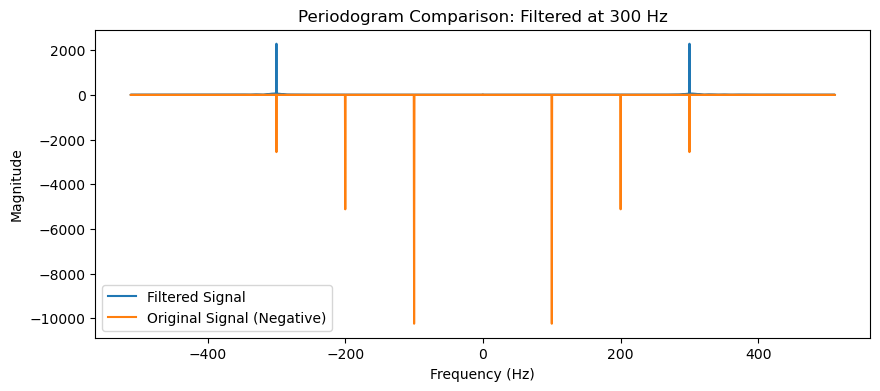

In [14]:
fir_3 = firwin(numtaps=101, cutoff=290/sin_Nyquist_freq, pass_zero=False)
fir_3_signal = lfilter(fir_3, 1.0, sin_signal)
fd_fir_3_signal = np.fft.fft(fir_3_signal)

plt.figure(figsize=(10, 4))
plt.plot(sin_freq_series, np.abs(fd_fir_3_signal), label='Filtered Signal')
plt.plot(sin_freq_series, -np.abs(sin_fd_signal), label='Original Signal (Negative)')
plt.title('Periodogram Comparison: Filtered at 300 Hz')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.show()